In [32]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import os
import torchvision
import gdown
import tarfile
import torchvision.utils as vutils
import torch.nn as nn
import torch.nn.functional as F
from shutil import copyfile
from PIL import Image
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split, Dataset

In [2]:
celeba_images_path = '/content/celeba/img_align_celeba'
partition_file_path = '/content/celeba/list_eval_partition.txt'
flowers_images_path = '/content/flowers102/jpg'

In [3]:
file_id = '1h_oR2jMJWO3JbIM63Oj2-2SjvnZkN3NI'
destination = 'celeba.zip'

gdown.download(f'https://drive.google.com/uc?id={file_id}', destination, quiet=False)

!unzip celeba.zip -d /content/celeba

Downloading...
From (original): https://drive.google.com/uc?id=1h_oR2jMJWO3JbIM63Oj2-2SjvnZkN3NI
From (redirected): https://drive.google.com/uc?id=1h_oR2jMJWO3JbIM63Oj2-2SjvnZkN3NI&confirm=t&uuid=64fdac8a-fa6f-4f6e-97e7-2fc63ca7fede
To: /content/celeba.zip
100%|██████████| 1.44G/1.44G [00:08<00:00, 164MB/s]


A streamkimeneten csak az utolsó 5000 sor látható.
 extracting: /content/celeba/img_align_celeba/197600.jpg  
 extracting: /content/celeba/img_align_celeba/197601.jpg  
 extracting: /content/celeba/img_align_celeba/197602.jpg  
 extracting: /content/celeba/img_align_celeba/197603.jpg  
 extracting: /content/celeba/img_align_celeba/197604.jpg  
 extracting: /content/celeba/img_align_celeba/197605.jpg  
 extracting: /content/celeba/img_align_celeba/197606.jpg  
 extracting: /content/celeba/img_align_celeba/197607.jpg  
 extracting: /content/celeba/img_align_celeba/197608.jpg  
 extracting: /content/celeba/img_align_celeba/197609.jpg  
 extracting: /content/celeba/img_align_celeba/197610.jpg  
 extracting: /content/celeba/img_align_celeba/197611.jpg  
 extracting: /content/celeba/img_align_celeba/197612.jpg  
 extracting: /content/celeba/img_align_celeba/197613.jpg  
 extracting: /content/celeba/img_align_celeba/197614.jpg  
 extracting: /content/celeba/img_align_celeba/197615.jpg  
 extr

In [4]:
file_id = '1ntYY__wPA50wd_zxwIw_h-TnfvWuXrKp'
destination = '/content/celeba/list_eval_partition.txt'

gdown.download(f'https://drive.google.com/uc?id={file_id}', destination, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1ntYY__wPA50wd_zxwIw_h-TnfvWuXrKp
To: /content/celeba/list_eval_partition.txt
100%|██████████| 2.84M/2.84M [00:00<00:00, 159MB/s]


'/content/celeba/list_eval_partition.txt'

In [5]:
file_id = '18-Lq0PpRpfiNHV7CozqDQUbH1iTrtnMT'
destination = 'flowers102.tgz'

gdown.download(f'https://drive.google.com/uc?id={file_id}', destination, quiet=False)

output_dir = './flowers102'
os.makedirs(output_dir, exist_ok=True)

with tarfile.open(destination) as tar:
    tar.extractall(path=output_dir)

Downloading...
From (original): https://drive.google.com/uc?id=18-Lq0PpRpfiNHV7CozqDQUbH1iTrtnMT
From (redirected): https://drive.google.com/uc?id=18-Lq0PpRpfiNHV7CozqDQUbH1iTrtnMT&confirm=t&uuid=22cbdd6c-5892-4eaa-8e68-dd246b35a5af
To: /content/flowers102.tgz
100%|██████████| 345M/345M [00:01<00:00, 196MB/s]


In [6]:
file_id = '1ekVLhSiTgDiQAj76d3JxRrepq7nZvh_L'
destination = '/content/flowers102/setid.mat'

gdown.download(f'https://drive.google.com/uc?id={file_id}', destination, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1ekVLhSiTgDiQAj76d3JxRrepq7nZvh_L
From (redirected): https://drive.google.com/uc?id=1ekVLhSiTgDiQAj76d3JxRrepq7nZvh_L&confirm=t&uuid=e75267f8-2bde-466a-8db3-97bf4c773f99
To: /content/flowers102/setid.mat
100%|██████████| 15.0k/15.0k [00:00<00:00, 24.6MB/s]


'/content/flowers102/setid.mat'

In [7]:
import scipy.io

mat = scipy.io.loadmat('/content/flowers102/setid.mat')

print(mat.keys())

train_ids = mat['trnid'].flatten()
valid_ids = mat['valid'].flatten()
test_ids = mat['tstid'].flatten()

print("Training set IDs:", train_ids)
print("Validation set IDs:", valid_ids)
print("Testing set IDs:", test_ids)


dict_keys(['__header__', '__version__', '__globals__', 'trnid', 'valid', 'tstid'])
Training set IDs: [6765 6755 6768 ... 8026 8036 8041]
Validation set IDs: [6773 6767 6739 ... 8028 8008 8030]
Testing set IDs: [6734 6735 6737 ... 8044 8045 8047]


In [8]:
os.makedirs('/content/flowers102/train', exist_ok=True)
os.makedirs('/content/flowers102/val', exist_ok=True)
os.makedirs('/content/flowers102/test', exist_ok=True)

def copy_images(set_ids, source_folder, target_folder):
    for img_id in set_ids:

        file_name = f'image_{img_id:05d}.jpg'

        source_path = os.path.join(source_folder, file_name)
        target_path = os.path.join(target_folder, file_name)

        if os.path.exists(source_path):
            copyfile(source_path, target_path)
        else:
            print(f"File not found: {source_path}")

copy_images(train_ids, flowers_images_path, '/content/flowers102/train')
copy_images(valid_ids, flowers_images_path, '/content/flowers102/val')
copy_images(test_ids, flowers_images_path, '/content/flowers102/test')

print("Images have been successfully split!")

Images have been successfully split!


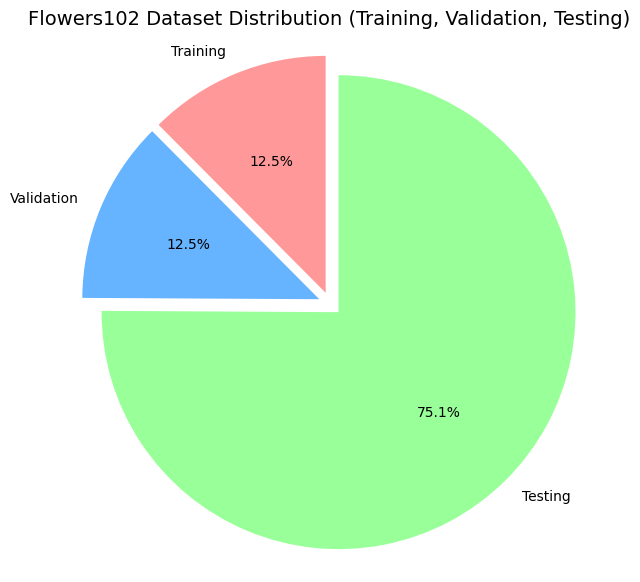

In [9]:
train_size = len(train_ids)
valid_size = len(valid_ids)
test_size = len(test_ids)

sizes = [train_size, valid_size, test_size]
labels = ['Training', 'Validation', 'Testing']
colors = ['#ff9999','#66b3ff','#99ff99']

plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=(0.05, 0.05, 0.05))

plt.axis('equal')

plt.title('Flowers102 Dataset Distribution (Training, Validation, Testing)', fontsize=14)

plt.show()


In [10]:
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [11]:
celeba_data = datasets.ImageFolder(root='/content/celeba', transform=transform)
celeba_loader = DataLoader(celeba_data, batch_size=64, shuffle=True)

flowers_data = datasets.ImageFolder(root='/content/flowers102', transform=transform)
flowers_loader = DataLoader(flowers_data, batch_size=64, shuffle=True)

In [12]:
celeba_data_iter = iter(celeba_loader)
images, labels = next(celeba_data_iter)
print(images.shape)

flowers_data_iter = iter(flowers_loader)
images, labels = next(flowers_data_iter)
print(images.shape)

torch.Size([64, 3, 64, 64])
torch.Size([64, 3, 64, 64])


In [13]:
partition_dict = {}
with open(partition_file_path, 'r') as file:
    for line in file.readlines():
        image_name, partition = line.strip().split()
        partition_dict[image_name] = int(partition)

In [14]:
class CelebADataset(Dataset):
    def __init__(self, root_dir, partition_dict, partition, transform=None):
        self.root_dir = root_dir
        self.partition_dict = partition_dict
        self.partition = partition
        self.transform = transform

        # Filter the image list based on the partition (0 for train, 1 for val, 2 for test)
        self.image_names = [img for img, p in partition_dict.items() if p == partition]

    def __len__(self):
        return len(self.image_names)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.image_names[idx])
        image = Image.open(img_name)

        if self.transform:
            image = self.transform(image)

        label = self.partition_dict[self.image_names[idx]]

        return image, label

In [15]:
celeba_train_dataset = CelebADataset(root_dir=celeba_images_path, partition_dict=partition_dict, partition=0, transform=transform)
celeba_val_dataset = CelebADataset(root_dir=celeba_images_path, partition_dict=partition_dict, partition=1, transform=transform)
celeba_test_dataset = CelebADataset(root_dir=celeba_images_path, partition_dict=partition_dict, partition=2, transform=transform)

In [16]:
print(f'Train dataset size: {len(celeba_train_dataset)}')
print(f'Validation dataset size: {len(celeba_val_dataset)}')
print(f'Test dataset size: {len(celeba_test_dataset)}')

Train dataset size: 162770
Validation dataset size: 19867
Test dataset size: 19962


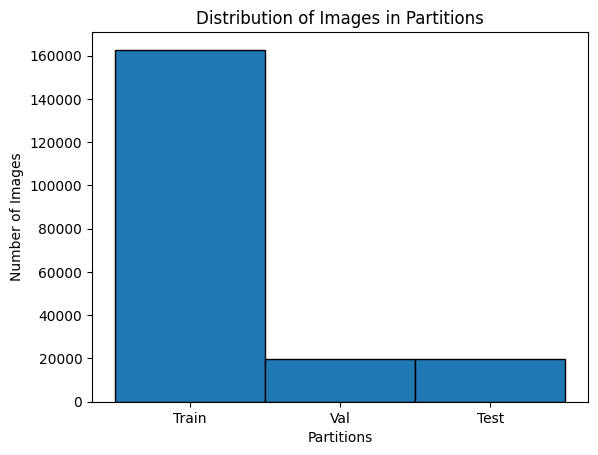

In [17]:
partitions = list(partition_dict.values())
plt.hist(partitions, bins=[-0.5, 0.5, 1.5, 2.5], edgecolor='black')
plt.xticks([0, 1, 2], ['Train', 'Val', 'Test'])
plt.xlabel('Partitions')
plt.ylabel('Number of Images')
plt.title('Distribution of Images in Partitions')
plt.show()

In [18]:
def check_image_validity(image_path):
    try:
        with Image.open(image_path) as img:
            img.verify()
        return True
    except (IOError, SyntaxError):
        return False

invalid_images = [img for img in os.listdir(celeba_images_path) if not check_image_validity(os.path.join(celeba_images_path, img))]
print(f'Invalid CelebA images: {len(invalid_images)}')


Invalid CelebA images: 0


Images batch shape: torch.Size([64, 3, 64, 64])
Labels batch shape: torch.Size([64])


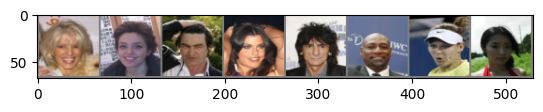

In [19]:
train_data_iter = iter(DataLoader(celeba_test_dataset, batch_size=64, shuffle=True))
images, labels = next(train_data_iter)

print(f'Images batch shape: {images.shape}')
print(f'Labels batch shape: {labels.shape}')

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

imshow(torchvision.utils.make_grid(images[:8]))

In [20]:
celeba_train_loader = DataLoader(celeba_train_dataset, batch_size=64, shuffle=True)
celeba_val_loader = DataLoader(celeba_val_dataset, batch_size=64, shuffle=False)
celeba_test_loader = DataLoader(celeba_test_dataset, batch_size=64, shuffle=False)

In [21]:
data_iter = iter(celeba_train_loader)
images, labels = next(data_iter)

print(f'Images batch shape: {images.shape}')
print(f'Labels batch shape: {labels.shape}')

Images batch shape: torch.Size([64, 3, 64, 64])
Labels batch shape: torch.Size([64])


In [22]:
class SimpleCNN(nn.Module):
    def __init__(self, num_classes=2):
        super(SimpleCNN, self).__init__()

        # Convolutional layers
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)

        # Pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

        # Fully connected layers
        self.fc1 = nn.Linear(128 * 8 * 8, 256)
        self.fc2 = nn.Linear(256, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))

        x = x.view(-1, 128 * 8 * 8)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)

        return x


In [23]:
# Modell inicializálása
num_classes = 2  # Bináris osztályozás esetén
model = SimpleCNN(num_classes=num_classes)

# Loss függvény és optimalizáló
criterion = nn.CrossEntropyLoss()  # A CrossEntropyLoss-t használjuk bináris osztályozás esetén
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [24]:
num_epochs = 2  # Tesztelés céljából egy kisebb értékkel kezdhetjük
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in range(num_epochs):
    running_loss = 0.0
    for images, labels in celeba_train_loader:
        images, labels = images.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(celeba_train_loader):.4f}')


KeyboardInterrupt: 

In [ ]:
model.eval()  # Kapcsoljuk ki a dropout és batchnorm rétegeket, ha vannak

correct = 0
total = 0
with torch.no_grad():
    for images, labels in celeba_test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Teszt adathalmazon elért pontosság: {100 * correct / total:.2f}%')


Teszt adathalmazon elért pontosság: 0.00%


In [25]:
class Generator(nn.Module):
    def __init__(self, latent_dim=64):
        super(Generator, self).__init__()
        self.fc1 = nn.Linear(latent_dim, 128)
        self.fc2 = nn.Linear(128, 64 * 64 * 3)

    def forward(self, z):
        x = torch.relu(self.fc1(z))
        x = torch.tanh(self.fc2(x))
        x = x.view(-1, 3, 64, 64)
        return x

class Discriminator(nn.Module):
    def __init__(self):  # Itt is __init__ szükséges
        super(Discriminator, self).__init__()
        self.fc1 = nn.Linear(64 * 64 * 3, 128)
        self.fc2 = nn.Linear(128, 1)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        h = torch.relu(self.fc1(x))
        return torch.sigmoid(self.fc2(h))


In [26]:
import torch.optim as optim

# Paraméterek
latent_dim = 100
lr = 0.0002
num_epochs = 5

# Modellek inicializálása
generator = Generator(latent_dim)
discriminator = Discriminator()

# Optimizer beállítása
optimizer_G = optim.Adam(generator.parameters(), lr=lr)
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr)

# Loss függvény
criterion = nn.BCELoss()

# Tréning ciklus
for epoch in range(num_epochs):
    for real_images, _ in celeba_train_loader:

        # Diszkriminátor tréningje
        optimizer_D.zero_grad()
        real_labels = torch.ones(real_images.size(0), 1)  # Valós képek címkéi (1)
        fake_labels = torch.zeros(real_images.size(0), 1)  # Generált képek címkéi (0)

        # Valós képek értékelése
        outputs = discriminator(real_images)
        d_loss_real = criterion(outputs, real_labels)

        # Generált képek értékelése
        z = torch.randn(real_images.size(0), latent_dim)  # Véletlen zaj generálása
        fake_images = generator(z)
        outputs = discriminator(fake_images.detach())
        d_loss_fake = criterion(outputs, fake_labels)

        # Teljes diszkriminátor veszteség
        d_loss = d_loss_real + d_loss_fake
        d_loss.backward()
        optimizer_D.step()

        # Generátor tréningje
        optimizer_G.zero_grad()
        z = torch.randn(real_images.size(0), latent_dim)  # Véletlen zaj generálása
        fake_images = generator(z)
        outputs = discriminator(fake_images)
        g_loss = criterion(outputs, real_labels)  # A generátornak 1-es címkét próbálunk elérni
        g_loss.backward()
        optimizer_G.step()

    print(f"Epoch [{epoch+1}/{num_epochs}], d_loss: {d_loss.item()}, g_loss: {g_loss.item()}")

Epoch [1/5], d_loss: 0.018566707149147987, g_loss: 4.74600887298584
Epoch [2/5], d_loss: 0.0153418043628335, g_loss: 5.428522109985352
Epoch [3/5], d_loss: 0.045769646763801575, g_loss: 5.981823921203613
Epoch [4/5], d_loss: 0.11541691422462463, g_loss: 6.557304382324219
Epoch [5/5], d_loss: 0.3697424829006195, g_loss: 6.709993839263916


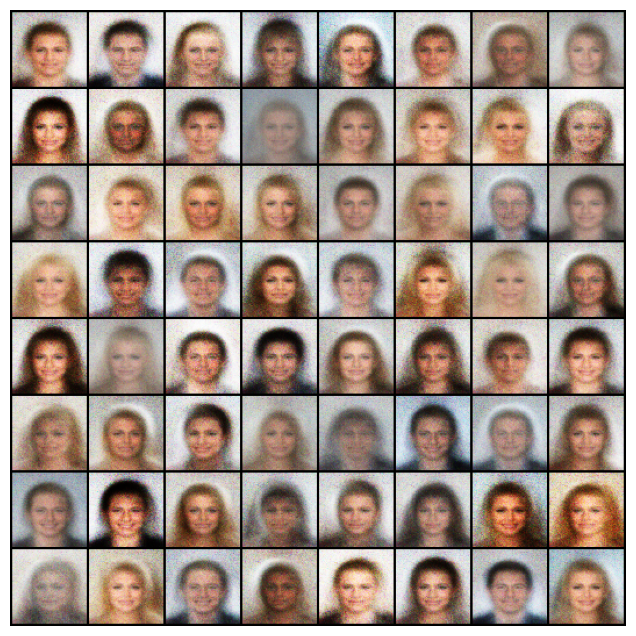

In [29]:
z = torch.randn(64, latent_dim)
fake_images = generator(z)

# Képek megjelenítése
plt.figure(figsize=(8, 8))
plt.axis("off")
plt.imshow(np.transpose(vutils.make_grid(fake_images, padding=2, normalize=True).cpu(), (1, 2, 0)))
plt.show()

In [35]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 890.6/890.6 kB 19.3 MB/s eta 0:00:00


In [36]:
from torchmetrics.image.fid import FrechetInceptionDistance

# Initialize FID metric
fid = FrechetInceptionDistance(feature=2048)

# Calculate FID score
generator.eval()
with torch.no_grad():
    for real_images, _ in celeba_test_loader:
        # Generate fake images using the generator
        z = torch.randn(real_images.size(0), latent_dim)  # Random noise
        fake_images = generator(z)

        # Update FID metric with real and generated images
        fid.update(real_images, real=True)
        fid.update(fake_images, real=False)

# Compute and print the FID score
fid_score = fid.compute()
print(f"FID Score: {fid_score}")


ModuleNotFoundError: FrechetInceptionDistance metric requires that `Torch-fidelity` is installed. Either install as `pip install torchmetrics[image]` or `pip install torch-fidelity`.

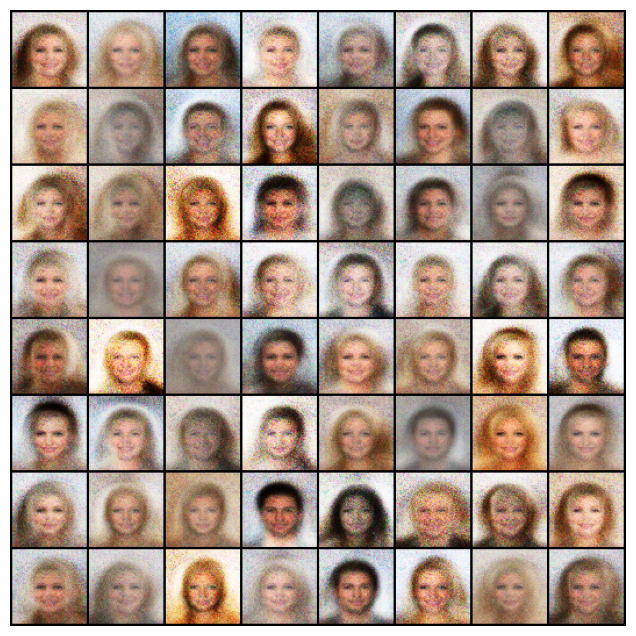

In [ ]:
# Véletlen zajt generálunk a képekhez
z = torch.randn(64, latent_dim)
fake_images = generator(z)

# Képek megjelenítése
plt.figure(figsize=(8, 8))
plt.axis("off")
plt.imshow(np.transpose(vutils.make_grid(fake_images, padding=2, normalize=True).cpu(), (1, 2, 0)))
plt.show()

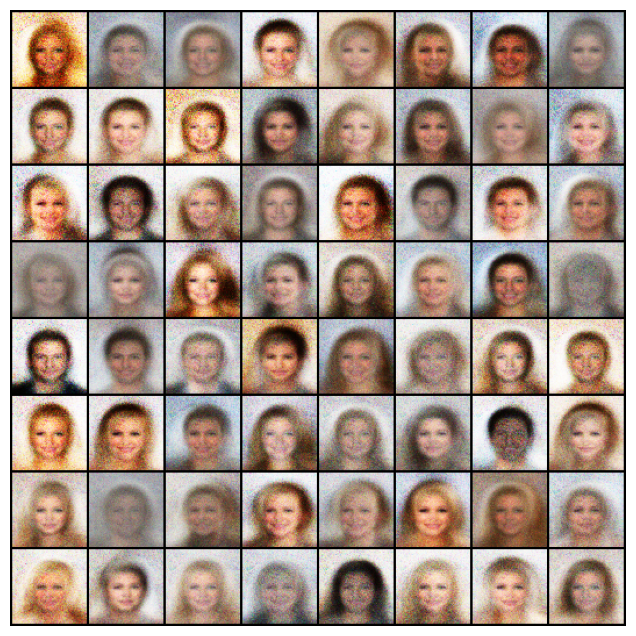

In [ ]:
# Új véletlen zajt generálunk a képekhez
z = torch.randn(64, latent_dim)  # latent_dim értéke ugyanaz legyen, amit korábban használtunk
fake_images = generator(z)

# Képek megjelenítése
plt.figure(figsize=(8, 8))
plt.axis("off")
plt.imshow(np.transpose(vutils.make_grid(fake_images, padding=2, normalize=True).cpu(), (1, 2, 0)))
plt.show()


In [ ]:
class Generator(nn.Module):
    def __init__(self, latent_dim=100, label_dim=1):
        super(Generator, self).__init__()
        self.fc1 = nn.Linear(latent_dim + label_dim, 128)
        self.fc2 = nn.Linear(128, 64 * 64 * 3)

    def forward(self, z, label):
        x = torch.cat([z, label], dim=1)  # Címke hozzáfűzése a zajhoz
        x = torch.relu(self.fc1(x))
        x = torch.tanh(self.fc2(x))
        x = x.view(-1, 3, 64, 64)
        return x

class Discriminator(nn.Module):
    def __init__(self, label_dim=1):
        super(Discriminator, self).__init__()
        self.fc1 = nn.Linear(64 * 64 * 3 + label_dim, 128)
        self.fc2 = nn.Linear(128, 1)

    def forward(self, x, label):
        x = x.view(x.size(0), -1)
        x = torch.cat([x, label], dim=1)  # Címke hozzáfűzése a bemenethez
        h = torch.relu(self.fc1(x))
        return torch.sigmoid(self.fc2(h))


Epoch [1/3], d_loss: 0.07051223516464233, g_loss: 3.9578540325164795
Epoch [2/3], d_loss: 0.07054085284471512, g_loss: 6.414731025695801
Epoch [3/3], d_loss: 0.2812148332595825, g_loss: 6.698873043060303
Női arcok:


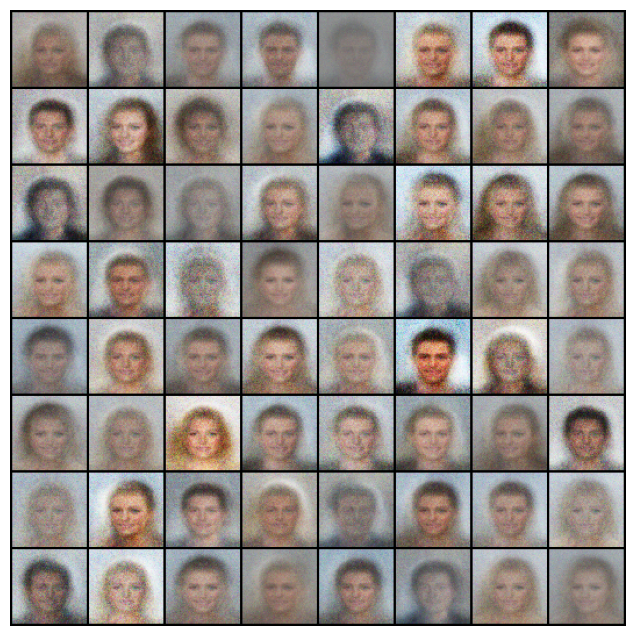

Férfi arcok:


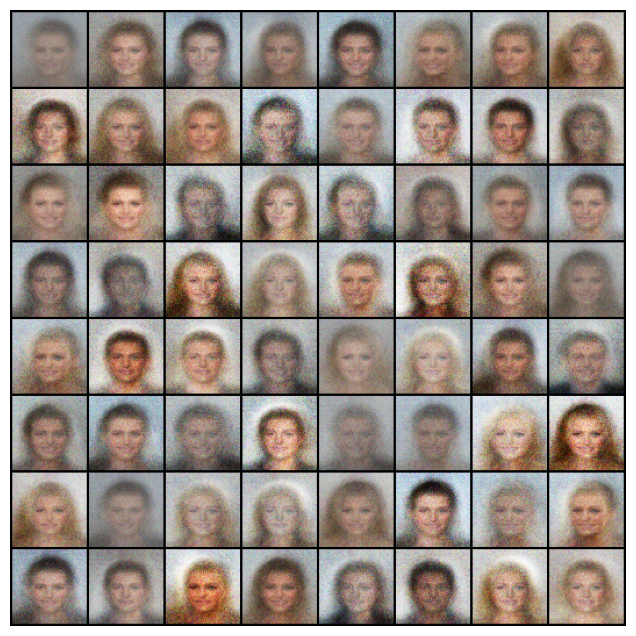

In [ ]:
# Paraméterek
latent_dim = 100
label_dim = 1
lr = 0.0002
num_epochs = 3

# Modellek inicializálása
generator = Generator(latent_dim, label_dim)
discriminator = Discriminator(label_dim)

# Optimizer beállítása
optimizer_G = optim.Adam(generator.parameters(), lr=lr)
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr)

# Loss függvény
criterion = nn.BCELoss()

# Tréning ciklus
for epoch in range(num_epochs):
    for real_images, _ in celeba_train_loader:

        batch_size = real_images.size(0)

        # Nemi címke generálása valós és generált képekhez (random férfi-nő címkék)
        real_labels = torch.ones(batch_size, 1)
        fake_labels = torch.zeros(batch_size, 1)

        # Diszkriminátor tréningje valós képekkel és címkékkel
        optimizer_D.zero_grad()
        gender_labels = torch.randint(0, 2, (batch_size, 1)).float()  # Random gender címkék (0: férfi, 1: nő)

        outputs = discriminator(real_images, gender_labels)
        d_loss_real = criterion(outputs, real_labels)

        # Generált képek diszkriminációja
        z = torch.randn(batch_size, latent_dim)
        fake_gender_labels = torch.randint(0, 2, (batch_size, 1)).float()  # Random gender címkék a generátornak
        fake_images = generator(z, fake_gender_labels)
        outputs = discriminator(fake_images.detach(), fake_gender_labels)
        d_loss_fake = criterion(outputs, fake_labels)

        # Teljes diszkriminátor veszteség
        d_loss = d_loss_real + d_loss_fake
        d_loss.backward()
        optimizer_D.step()

        # Generátor tréningje
        optimizer_G.zero_grad()
        z = torch.randn(batch_size, latent_dim)
        fake_images = generator(z, fake_gender_labels)
        outputs = discriminator(fake_images, fake_gender_labels)
        g_loss = criterion(outputs, real_labels)  # A generátornak 1-es címkét próbálunk elérni
        g_loss.backward()
        optimizer_G.step()

    print(f"Epoch [{epoch+1}/{num_epochs}], d_loss: {d_loss.item()}, g_loss: {g_loss.item()}")

# Generált képek vizualizálása férfi és női címkékkel
def generate_and_display_images(label_value):
    z = torch.randn(64, latent_dim)
    gender_labels = torch.full((64, 1), label_value).float()  # Mind 0 (férfi) vagy mind 1 (nő)
    fake_images = generator(z, gender_labels)

    plt.figure(figsize=(8, 8))
    plt.axis("off")
    plt.imshow(np.transpose(vutils.make_grid(fake_images, padding=2, normalize=True).cpu(), (1, 2, 0)))
    plt.show()

# Női (1) arcok generálása
print("Női arcok:")
generate_and_display_images(label_value=1)

# Férfi (0) arcok generálása
print("Férfi arcok:")
generate_and_display_images(label_value=0)
